# Разделимость данных

Примените алгоритмы уменьшения размерности к данным из предыдущей лабораторной, объясните полученные результаты

1. С помощью любого из рассмотренных на лекциях алгоритмов снижения размерности спроецируйте тренировочные данные в 2d пространство. Визуализируйте результаты снижения размерности. Цветом обозначьте категорию объекта
1. Примените алгоритм кластеризации к спроецированным данным. Расчитайте средние внутрикластерное и межкласторное расстояния получившейся проекции
1. Опишите результаты 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../lab4/nba2k20-full.csv")

In [3]:
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State


In [4]:
cols = ['rating', 'height', 'weight', 'salary']

In [5]:
X = df[cols]

In [6]:
X

,rating,height,weight,salary
0,97,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858
1,97,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000
2,96,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697
3,96,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000
4,96,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000
...,...,...,...,...
424,68,6-0 / 1.83,180 lbs. / 81.6 kg.,$522738
425,68,6-3 / 1.91,200 lbs. / 90.7 kg.,$79568
426,68,6-10 / 2.08,200 lbs. / 90.7 kg.,$79568
427,68,6-3 / 1.91,190 lbs. / 86.2 kg.,$898310


In [7]:
y = df['position']

In [8]:
y

0        F
1        F
2      F-G
3        F
4        G
      ... 
424      G
425      G
426      F
427      G
428      F
Name: position, Length: 429, dtype: object

In [9]:
X.isna().sum()

rating    0
height    0
weight    0
salary    0
dtype: int64

In [10]:
X.loc[:, 'height'] = X.loc[:, 'height'].apply(lambda x : float(x.split('/')[1]))

/Users/maria/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [11]:
X.loc[:, 'weight'] = X.loc[:, 'weight'].apply(lambda x : float((x.split("/")[1]).split(" ")[1]))

In [12]:
X['weight'].head()

0    113.4
1    102.1
2    109.8
3    104.3
4     99.8
Name: weight, dtype: float64

In [13]:
X.loc[:, 'salary'] = X.loc[:, 'salary'].apply(lambda x : int(x[1:]))

In [14]:
X

,rating,height,weight,salary
0,97,2.06,113.4,37436858
1,97,2.01,102.1,32742000
2,96,2.11,109.8,25842697
3,96,2.08,104.3,37199000
4,96,1.96,99.8,38199000
...,...,...,...,...
424,68,1.83,81.6,522738
425,68,1.91,90.7,79568
426,68,2.08,90.7,79568
427,68,1.91,86.2,898310


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [17]:
y

array([2, 2, 4, 2, 5, 5, 3, 2, 5, 0, 5, 0, 5, 5, 3, 5, 0, 2, 5, 5, 6, 3,
       5, 5, 6, 5, 5, 3, 5, 2, 2, 5, 5, 0, 0, 2, 5, 0, 5, 2, 5, 5, 0, 2,
       1, 5, 5, 2, 5, 2, 5, 2, 5, 5, 2, 6, 5, 2, 2, 2, 3, 0, 2, 0, 0, 0,
       5, 3, 3, 5, 3, 2, 2, 2, 2, 2, 0, 3, 0, 0, 5, 2, 2, 2, 5, 0, 2, 5,
       5, 2, 5, 3, 0, 5, 2, 5, 2, 0, 5, 5, 5, 2, 5, 0, 0, 0, 5, 2, 2, 5,
       2, 2, 5, 5, 5, 5, 3, 0, 5, 5, 5, 2, 5, 6, 5, 2, 5, 2, 0, 4, 2, 3,
       5, 5, 5, 5, 2, 5, 2, 2, 0, 4, 5, 4, 2, 2, 2, 2, 5, 5, 0, 2, 5, 3,
       1, 1, 3, 2, 2, 5, 5, 1, 0, 5, 1, 4, 5, 5, 2, 2, 5, 2, 5, 5, 2, 0,
       0, 4, 2, 2, 5, 2, 2, 2, 3, 2, 2, 0, 5, 5, 0, 5, 2, 5, 6, 5, 5, 0,
       5, 5, 2, 5, 5, 0, 0, 5, 5, 0, 4, 4, 5, 5, 5, 5, 5, 2, 4, 5, 2, 2,
       2, 5, 2, 2, 2, 0, 2, 0, 5, 5, 5, 2, 5, 4, 5, 2, 2, 6, 2, 2, 3, 0,
       6, 5, 0, 5, 5, 5, 5, 3, 5, 5, 3, 2, 4, 5, 2, 5, 3, 3, 2, 5, 0, 3,
       2, 5, 3, 2, 5, 3, 2, 3, 2, 4, 5, 2, 2, 5, 5, 4, 5, 5, 0, 6, 5, 2,
       2, 5, 5, 2, 2, 5, 2, 0, 6, 3, 5, 5, 2, 2, 5,

In [18]:
import warnings
warnings.filterwarnings('ignore')
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Populating the interactive namespace from numpy and matplotlib


Projecting 4-dimensional data to 2D


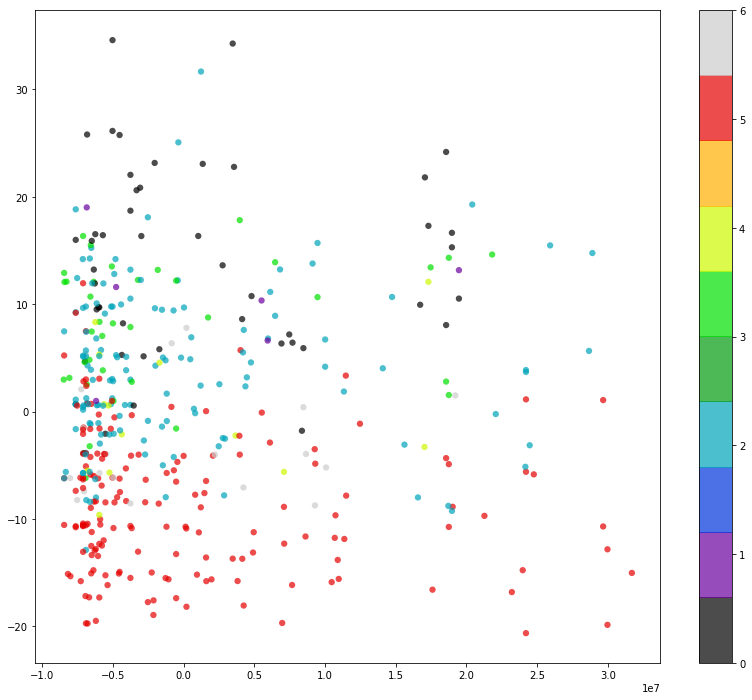

In [20]:
pca = PCA(n_components=2)
X_reduced_pca = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(14,12))
plt.scatter(X_reduced_pca[:, 0], X_reduced_pca[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.show()

In [22]:
from sklearn.manifold import TSNE

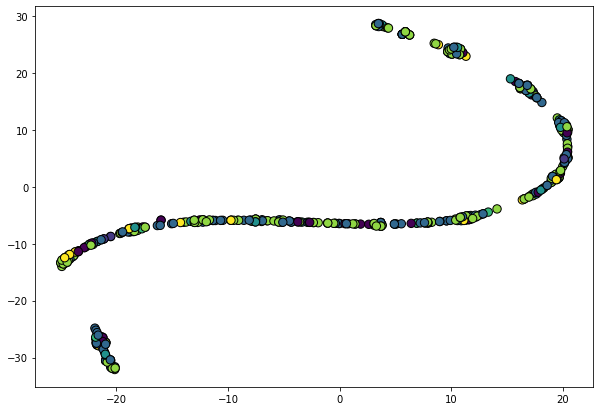

In [23]:
tsne = TSNE(n_components=2, random_state=42)

X_reduced = tsne.fit_transform(X)


plt.figure(figsize=(10,7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=70, edgecolor="k")
plt.show()

In [24]:
from sklearn.cluster import KMeans

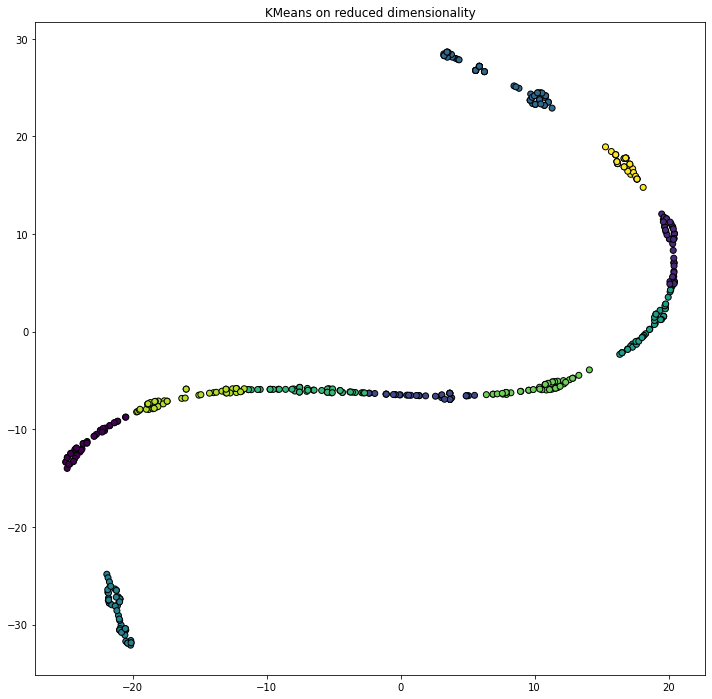

In [25]:
plt.figure(figsize=(12, 12))

y_pred = KMeans(n_clusters=10, random_state=1).fit_predict(X_reduced)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred, edgecolor='k')
plt.title("KMeans on reduced dimensionality")

plt.show()

Формулы подсчета: http://www.machinelearning.ru/wiki/images/archive/2/28/20150427184336%21Voron-ML-Clustering-slides.pdf#page=14

In [26]:
sum_eq = 0
cnt_eq = 0
sum_neq = 0
cnt_neq = 0

n = len(y_pred)
for i in range(n):
    ypi = y_pred[i]
    xri = X_reduced[i]
    for j in range(i + 1, n):
        ypj = y_pred[j]
        xrj = X_reduced[j]
        dist = np.linalg.norm(xrj - xri)
        if ypi == ypj:
            sum_eq += dist
            cnt_eq += 1
        else:
            sum_neq += dist
            cnt_neq += 1

print("Same cluster distance:", sum_eq / cnt_eq)
print("Different cluster distance:", sum_neq / cnt_neq)

Same cluster distance: 2.8903994844994196
Different cluster distance: 29.534676545099153


In [27]:
sum_eq = 0
cnt_eq = 0
sum_neq = 0
cnt_neq = 0

n = len(y_pred)
for i in range(n):
    ypi = y_pred[i]
    xri = X_reduced_pca[i]
    for j in range(i + 1, n):
        ypj = y_pred[j]
        xrj = X_reduced_pca[j]
        dist = np.linalg.norm(xrj - xri)
        if ypi == ypj:
            sum_eq += dist
            cnt_eq += 1
        else:
            sum_neq += dist
            cnt_neq += 1

print("Same cluster distance:", sum_eq / cnt_eq)
print("Different cluster distance:", sum_neq / cnt_neq)

Same cluster distance: 1306654.4262047107
Different cluster distance: 10120534.973394599


Кластеры не отражают реальную картину, так как не никак не связаны с целевой переменной. 